In [1]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
data= pd.read_csv("https://raw.githubusercontent.com/Fiska21/Portofolio/main/Customer%20Segmentation/marketing_data.csv")

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
data.shape

(2240, 28)

In [7]:
# cek missing value
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
#cek duplikasi data 
data.duplicated().sum()

0

In [10]:
#cek duplikasi data 2
id=data["ID"]
dobel = data[id.isin(id[id.duplicated()])].sort_values(by="ID")
dobel

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


In [11]:
# replace format income, karena penulisan kolom mengandung spasi, kita hapus dulu spasinya
data.columns = data.columns.str.replace(" ", "")


In [12]:
data["Income"] = data["Income"].str.replace("$", "").str.replace(",", "").astype(float)
data["Income"] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2216, dtype: float64

In [13]:
# Format dt_customer masih berbentuk object, ubah ke bentuk date
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data["Dt_Customer"] 

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [16]:
# cek korelasi data secara pearson
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,-0.021491,0.034154
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,0.023692,-0.030407
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,0.133047,-0.027225
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,-0.077909,0.040978
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,-0.153901,0.003307
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,-0.199766,0.013637
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,0.246299,-0.039470
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,0.122443,-0.005324
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,0.237746,-0.023782
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,0.108145,-0.021220


Terdapat korelasi positif yang kuat antara jumlah pembelian melalui katalog dengan jumlah pembelian produk meat dan produk wines.

Dan juga terdapat korelasi negatif yang cukup tinggi antara income dengan junlah kunjungan web company.

In [15]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [16]:
# Tambahkan satu kolom untuk menghitung total frekuensi dari semua channel

data["Num_Purchase"] = data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]+data["NumDealsPurchases"]

In [17]:
# Hitung rata-rata frequency pembelian di manakah yang paling sering dilakukan oleh ID yang memiliki anak (kid atau teen)
data_kid = data[["Kidhome","Teenhome","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","Num_Purchase"]]
data_kid[(data_kid["Kidhome"]> 0) | (data_kid["Teenhome"]> 0)].describe()

,Kidhome,Teenhome,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,Num_Purchase
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,0.618446,0.707517,3.957044,1.831965,5.215414,2.795957,13.800379
std,0.542470,0.521098,2.828995,2.297872,3.048029,1.980482,7.814899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,7.000000
50%,1.000000,1.000000,3.000000,1.000000,4.000000,2.000000,12.000000
75%,1.000000,1.000000,6.000000,3.000000,7.000000,4.000000,20.000000
max,2.000000,2.000000,25.000000,28.000000,13.000000,15.000000,43.000000


Rata-rata pembelian oleh ID yang memiliki anak sebanyak 13 kali dan paling banyak dilakukan melalui store dengan rata-rata 5.2 == 5 kali. dimana rata-rata pembelian dengan diskon sebesar 2.7 == 3 kali.

In [18]:
# Jumlah pembelian di manakah yang paling sering dilakukan oleh ID tidak memiliki kid
no_kid = data[["Kidhome","Teenhome","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","Num_Purchase"]]
no_kid[(no_kid["Kidhome"] == 0) & (data_kid["Teenhome"] == 0)].describe()

,Kidhome,Teenhome,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,Num_Purchase
count,633.0,633.0,633.000000,633.000000,633.000000,633.000000,633.000000
mean,0.0,0.0,4.406003,4.769352,7.265403,1.142180,17.582938
std,0.0,0.0,2.480512,3.260408,3.282436,1.093134,6.566589
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,3.000000,2.000000,5.000000,1.000000,14.000000
50%,0.0,0.0,4.000000,5.000000,7.000000,1.000000,19.000000
75%,0.0,0.0,6.000000,7.000000,10.000000,1.000000,22.000000
max,0.0,0.0,27.000000,28.000000,13.000000,15.000000,44.000000


Jumlah Customer yang tidak punya anak di rumahnya ada 633 customer, 1.5 kali lebih sedikit dibanding customer yang punya anak di rumah.

Rata-rata pembelian oleh ID yang tidak memiliki kid atau teen lebih banyak dibanding yang punya anak sebanyak 18 kali per ID dan paling banyak dilakukan melalui store juga dengan rata-rata 7.2 == 7 kali. 

Namun rata-rata pembelian dengan diskon lebih sedikit dibanding customer yang memiliki anak yaitu hanya 1.1 == 1 kali per customer.

In [19]:
# buat tambahan kolom untuk menghitung jumlah total pengeluaran dari setiap tipe
data["Total_Spent"] = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

In [20]:
data_kid = data[["Kidhome","Teenhome","Total_Spent"]]
kid_spent=data_kid[(data_kid["Kidhome"]> 0) | (data_kid["Teenhome"]> 0)].describe()
kid_spent

,Kidhome,Teenhome,Total_Spent
count,1583.000000,1583.000000,1583.000000
mean,0.618446,0.707517,407.869236
std,0.542470,0.521098,451.055641
min,0.000000,0.000000,5.000000
25%,0.000000,0.000000,55.000000
50%,1.000000,1.000000,198.000000
75%,1.000000,1.000000,661.500000
max,2.000000,2.000000,2194.000000


In [21]:
no_kid = data[["Kidhome","Teenhome","Total_Spent"]]
no_kid_spent = no_kid[(no_kid["Kidhome"] == 0) & (data_kid["Teenhome"] == 0)].describe()
no_kid_spent

,Kidhome,Teenhome,Total_Spent
count,633.0,633.0,633.000000
mean,0.0,0.0,1105.248025
std,0.0,0.0,645.523277
min,0.0,0.0,6.000000
25%,0.0,0.0,634.000000
50%,0.0,0.0,1189.000000
75%,0.0,0.0,1588.000000
max,0.0,0.0,2525.000000


In [22]:
data["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

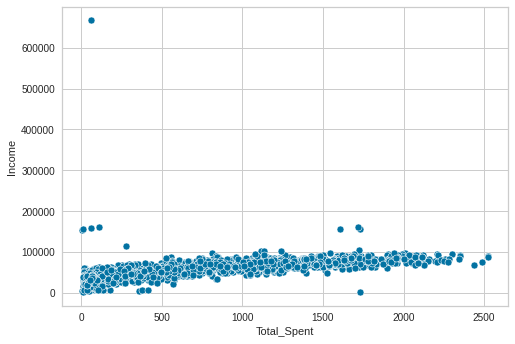

In [23]:
sns.scatterplot(data=data, x="Total_Spent", y ="Income")

In [24]:
data['IncomeLevel'] = np.select(
    [
     data['Income']<= 25000,
      (data['Income']> 25000) & (data['Income']<=50000),
      (data['Income']> 50000) & (data['Income']<=75000),
     (data['Income']> 75000) & (data['Income']<=100000),
     data['Income']> 100000
    ],
    [
     '<= 25000',
     '>25.0000 - 50000',
     '>50.000 - 75000',
     '>75.000 - 100.000',
   ">100.000"
    ]
)

In [25]:
data.groupby("IncomeLevel")["ID"].count().sort_values(ascending= False)

IncomeLevel
>25.0000 - 50000     818
>50.000 - 75000      797
>75.000 - 100.000    346
<= 25000             242
>100.000              13
Name: ID, dtype: int64

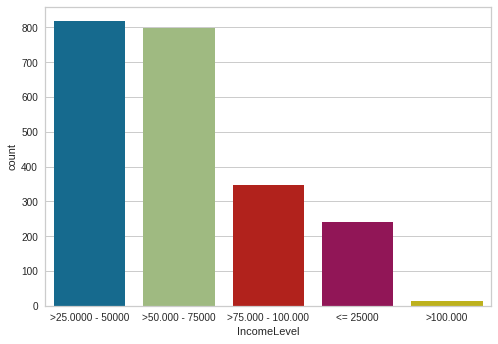

In [26]:
sns.countplot(data = data, x="IncomeLevel",  order = data['IncomeLevel'].value_counts().index)

Customer dengan income 25.000 - 50.000 ada sebanyak 818 customer. 3% lebih banyak dibanding dengan customer dengan level income 51.000 - 75000.

In [27]:
Incomelevel_Contribution = data.groupby(["IncomeLevel"])["Total_Spent"].agg("sum").reset_index()
Incomelevel_Contribution = Incomelevel_Contribution.sort_values(by = "Total_Spent", ascending=False)
Incomelevel_Contribution
# buat cumulative incremental start values tertinggi 
Incomelevel_Contribution["cum_percentage"] = round(Incomelevel_Contribution["Total_Spent"].cumsum()/Incomelevel_Contribution["Total_Spent"].sum()*100,2)
Incomelevel_Contribution

,IncomeLevel,Total_Spent,cum_percentage
3,>50.000 - 75000,675747,50.23
4,>75.000 - 100.000,501823,87.53
2,>25.0000 - 50000,139506,97.90
0,<= 25000,17418,99.20
1,>100.000,10785,100.00


Namun jika dilihat secara kontribusi, customer dengan level Income 50.000 s/d 100.000 adalah yang memberikan 87% sales value paling tinggi.

# **CLUSTERING K-MEANS**

Karena K-Means ini sensitive terhadap outliers, maka kita cek lebih dulu variabel- variabel yang akan menentukan cluster.

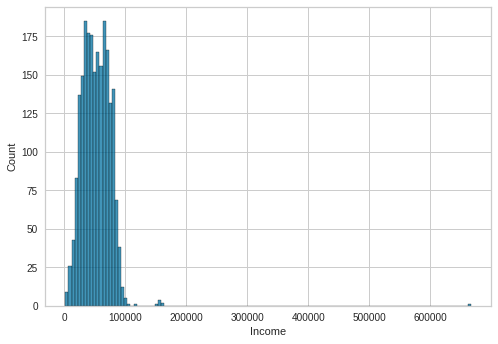

In [28]:
# Terdapat outlier pada distribusi income
dtModel = data[[ 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]
dtModel

sns.histplot(data= dtModel , x="Income")


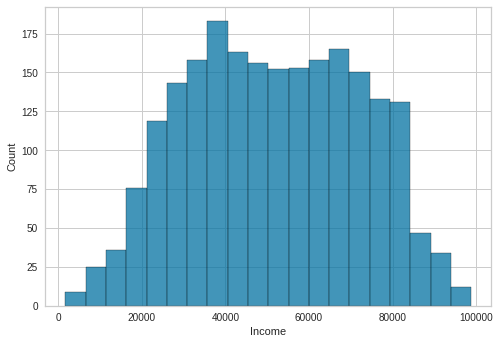

In [29]:
# buang outlier income
dtModel = dtModel[dtModel["Income"]<=100000]

sns.histplot(data= dtModel , x="Income")

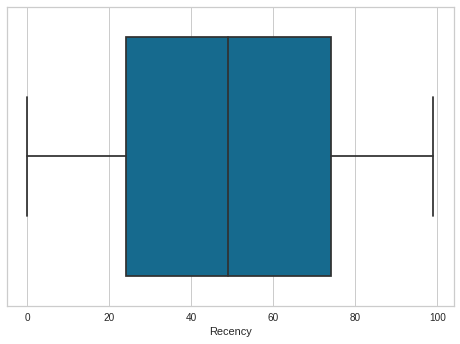

In [30]:
# Cek Distribusi recency
sns.boxplot(data= dtModel , x="Recency")

In [31]:
dtModel.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,51512.049932,0.443032,0.507490,49.046754,305.584657,26.319564,165.364049,37.683159,26.864730,43.945983
std,20577.702498,0.537259,0.544407,28.939052,337.236335,39.663326,217.982657,54.751768,40.605385,51.671395
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35187.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,51250.000000,0.000000,0.000000,49.000000,177.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,68134.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000
max,98777.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,198.000000,321.000000


In [32]:
# Standarisasi data dengan scaler
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(dtModel[[ 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].to_numpy())
data_for_kmeans = pd.DataFrame(scaled_data, columns = [ 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'])
data_for_kmeans

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1.619739,-0.824803,-0.932400,-1.695214,-0.345785,1.958940,0.980282,1.339381,3.993856,3.369244
1,0.271178,-0.824803,-0.932400,-1.695214,0.469852,-0.537635,-0.465115,-0.560532,-0.661755,-0.134457
2,0.765806,-0.824803,0.904878,-1.695214,-0.508912,-0.386328,-0.488058,-0.414385,-0.612490,-0.269959
3,-0.925389,1.036920,0.904878,-1.695214,-0.876690,-0.663725,-0.754195,-0.688411,-0.661755,-0.850683
4,-1.460069,1.036920,-0.932400,-1.695214,-0.888554,-0.260238,-0.648658,-0.487459,-0.661755,-0.192529
...,...,...,...,...,...,...,...,...,...,...
2198,0.727358,-0.824803,0.904878,1.726545,0.196985,-0.209802,-0.180624,0.170204,0.520622,0.659199
2199,-0.994314,1.036920,-0.932400,1.726545,-0.891520,-0.411546,-0.699132,-0.633606,-0.464692,-0.540963
2200,-0.252858,1.036920,-0.932400,1.726545,-0.357648,-0.613289,-0.354990,-0.414385,-0.538591,-0.579678
2201,0.695423,-0.824803,-0.932400,1.726545,-0.114440,0.294556,2.457799,2.033580,3.402668,0.368837


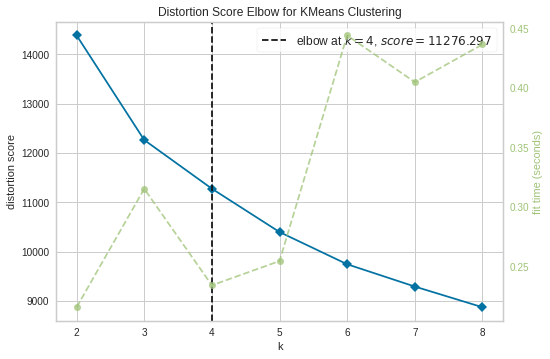

In [33]:
#Menentukan Jumlah Cluster Optimal dengan Metode Elbow coba dengan cluster maksimal 10 cluster
model = KElbowVisualizer(KMeans(random_state=1000), k=8)
model.fit(data_for_kmeans)
model.show()

In [34]:
# Buat cluster dengan K-Means - k=4
kmeans_model = KMeans(
    n_clusters = 4,
    random_state=1000
)
kmeans_model.fit(data_for_kmeans)

KMeans(n_clusters=4, random_state=1000)

In [35]:
# Cek Frekuensi untuk masing2 Cluster
np.unique(kmeans_model.labels_, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([613, 515, 574, 501]))

In [36]:
# Assign cluster to column
dtModel["cluster"] = kmeans_model.labels_

In [37]:
dtModel

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
0,84835.0,0,0,0,189,104,379,111,189,218,1
1,57091.0,0,0,0,464,5,64,7,0,37,3
2,67267.0,0,1,0,134,11,59,15,2,30,3
3,32474.0,1,1,0,10,0,1,0,0,0,2
4,21474.0,1,0,0,6,16,24,11,0,34,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,66476.0,0,1,99,372,18,126,47,48,78,3
2236,31056.0,1,0,99,5,10,13,3,8,16,0
2237,46310.0,1,0,99,185,2,88,15,5,14,0
2238,65819.0,0,0,99,267,38,701,149,165,63,1


In [38]:
dtModel.groupby("cluster")["cluster"].count()

cluster
0    613
1    515
2    574
3    501
Name: cluster, dtype: int64

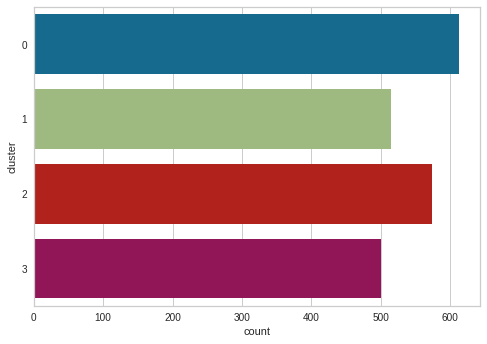

In [39]:
sns.countplot(data=dtModel, y= "cluster")

In [41]:
cluster0 = dtModel[dtModel["cluster"] == 0]
cluster0.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
count,613.000000,613.000000,613.0,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.0
mean,30422.944535,0.814029,0.0,49.075041,45.205546,7.530179,34.768352,10.996737,7.603589,19.959217,0.0
std,11225.586774,0.455180,0.0,28.721065,81.102857,11.516023,79.700308,16.933163,11.590696,27.085497,0.0
min,1730.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,22634.000000,1.000000,0.0,24.000000,5.000000,1.000000,8.000000,2.000000,1.000000,5.000000,0.0
50%,30093.000000,1.000000,0.0,48.000000,14.000000,4.000000,16.000000,6.000000,4.000000,12.000000,0.0
75%,37717.000000,1.000000,0.0,75.000000,42.000000,9.000000,38.000000,13.000000,10.000000,24.000000,0.0
max,71427.000000,2.000000,0.0,99.000000,746.000000,123.000000,1725.000000,150.000000,157.000000,262.000000,0.0


In [42]:
cluster1 = dtModel[dtModel["cluster"] == 1]
cluster1.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.0
mean,74957.456311,0.058252,0.196117,50.464078,584.949515,75.110680,464.844660,110.961165,77.770874,82.400000,1.0
std,10843.669924,0.234448,0.411867,29.364411,305.428004,50.866283,228.721347,64.078005,51.207045,61.145702,0.0
min,31907.000000,0.000000,0.000000,0.000000,33.000000,0.000000,64.000000,0.000000,0.000000,0.000000,1.0
25%,69238.000000,0.000000,0.000000,26.000000,350.000000,30.500000,279.500000,60.000000,35.500000,34.000000,1.0
50%,75794.000000,0.000000,0.000000,53.000000,531.000000,68.000000,430.000000,102.000000,69.000000,63.000000,1.0
75%,82019.500000,0.000000,0.000000,75.500000,796.000000,109.500000,623.500000,159.500000,115.000000,118.500000,1.0
max,98777.000000,1.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,198.000000,249.000000,1.0


In [112]:
cluster2 = dtModel[dtModel["cluster"] == 2]
cluster2.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.0
mean,43009.280488,0.728223,1.052265,49.083624,102.243902,4.522648,33.932056,6.419861,4.508711,17.484321,2.0
std,11545.193669,0.547249,0.222755,29.288836,115.524948,8.103950,39.407442,10.402864,7.729215,20.528249,0.0
min,4023.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.0
25%,35860.000000,0.000000,1.000000,24.000000,21.000000,0.000000,9.000000,0.000000,0.000000,4.000000,2.0
50%,43800.000000,1.000000,1.000000,50.000000,54.000000,2.000000,19.000000,3.000000,2.000000,10.000000,2.0
75%,50616.000000,1.000000,1.000000,74.000000,153.750000,5.000000,44.000000,8.000000,5.000000,24.000000,2.0
max,79146.000000,2.000000,2.000000,99.000000,604.000000,70.000000,309.000000,82.000000,67.000000,152.000000,2.0


In [113]:
cluster3 = dtModel[dtModel["cluster"] == 3]
cluster3.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,cluster
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.0
mean,62956.814371,0.057884,0.824351,47.512974,569.970060,24.127745,167.888224,30.828343,23.716567,64.083832,3.0
std,10549.125995,0.233758,0.465925,28.365725,317.181161,24.409335,113.150764,30.547970,25.002310,55.635824,0.0
min,4428.000000,0.000000,0.000000,0.000000,16.000000,0.000000,12.000000,0.000000,0.000000,0.000000,3.0
25%,56320.000000,0.000000,1.000000,24.000000,320.000000,7.000000,83.000000,8.000000,6.000000,24.000000,3.0
50%,62859.000000,0.000000,1.000000,47.000000,524.000000,17.000000,136.000000,21.000000,16.000000,44.000000,3.0
75%,69263.000000,0.000000,1.000000,71.000000,757.000000,35.000000,227.000000,46.000000,34.000000,91.000000,3.0
max,93404.000000,1.000000,2.000000,99.000000,1492.000000,142.000000,590.000000,153.000000,151.000000,321.000000,3.0


In [43]:
gab=pd.concat([data,dtModel],axis=1, join = "inner")


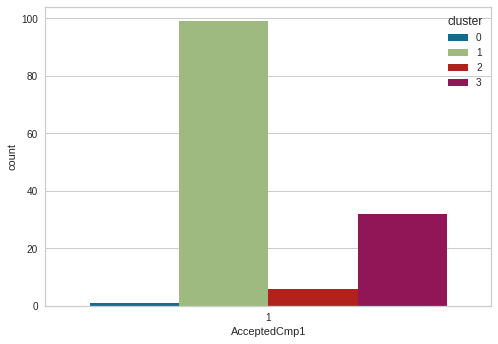

In [44]:
# Acceptance Campaign 1
sns.countplot(data=gab[gab["AcceptedCmp1"]==1], x="AcceptedCmp1", hue="cluster")

In [45]:
gab[gab["AcceptedCmp1"]==1].groupby(["AcceptedCmp1","cluster"])["cluster"].count()

AcceptedCmp1  cluster
1             0           1
              1          99
              2           6
              3          32
Name: cluster, dtype: int64

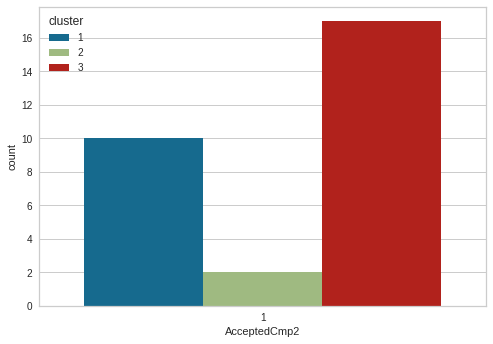

In [46]:
# Acceptance Campaign 2
sns.countplot(data=gab[gab["AcceptedCmp2"]== 1], x="AcceptedCmp2", hue="cluster")

In [47]:
gab[gab["AcceptedCmp2"]==1].groupby(["AcceptedCmp2","cluster"])["cluster"].count()

AcceptedCmp2  cluster
1             1          10
              2           2
              3          17
Name: cluster, dtype: int64

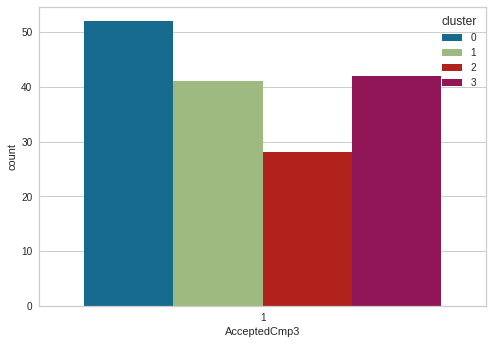

In [48]:
# Acceptance Campaign 3
sns.countplot(data=gab[gab["AcceptedCmp3"]==1], x="AcceptedCmp3", hue="cluster")

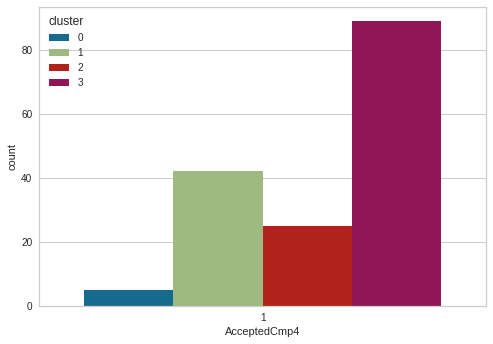

In [49]:
# Acceptance Campaign 4
sns.countplot(data=gab[gab["AcceptedCmp4"]==1], x="AcceptedCmp4", hue="cluster")

In [144]:
gab[gab["AcceptedCmp4"]==1].groupby(["AcceptedCmp4","cluster"])["cluster"].count()

AcceptedCmp4  cluster
1             0           5
              1          42
              2          25
              3          89
Name: cluster, dtype: int64

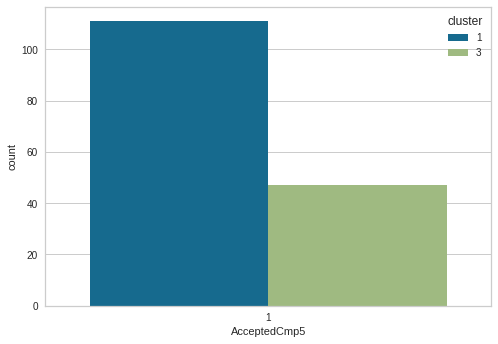

In [138]:
# Acceptance Campaign 5
sns.countplot(data=gab[gab["AcceptedCmp5"]==1], x="AcceptedCmp5", hue="cluster")

In [145]:
gab[gab["AcceptedCmp5"]==1].groupby(["AcceptedCmp5","cluster"])["cluster"].count()

AcceptedCmp5  cluster
1             1          111
              3           47
Name: cluster, dtype: int64

In [ ]:
gab[gab["AcceptedCmp5"]==1].groupby(["AcceptedCmp5","cluster"])["cluster"].count()

In [50]:
gab.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Num_Purchase',
       'Total_Spent', 'IncomeLevel', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'cluster'],
      dtype='object')

In [57]:
Channel0 = gab[["cluster","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","Num_Purchase"]]
Channel0[Channel0["cluster"] == 0].mean()

cluster                0.000000
NumWebPurchases        2.448613
NumCatalogPurchases    0.660685
NumStorePurchases      3.337684
NumDealsPurchases      1.990212
Num_Purchase           8.437194
dtype: float64

In [58]:
Channel1 = gab[["cluster","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","Num_Purchase"]]
Channel1[Channel1["cluster"] == 1].mean()

cluster                 1.000000
NumWebPurchases         5.380583
NumCatalogPurchases     5.782524
NumStorePurchases       8.460194
NumDealsPurchases       1.469903
Num_Purchase           21.093204
dtype: float64

In [59]:
Channel2 = gab[["cluster","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","Num_Purchase"]]
Channel2[Channel2["cluster"] == 2].mean()

cluster                 2.000000
NumWebPurchases         2.864111
NumCatalogPurchases     0.865854
NumStorePurchases       3.942509
NumDealsPurchases       2.987805
Num_Purchase           10.660279
dtype: float64

In [60]:
Channel3 = gab[["cluster","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","Num_Purchase"]]
Channel3[Channel3["cluster"] == 3].mean()

cluster                 3.000000
NumWebPurchases         6.143713
NumCatalogPurchases     3.844311
NumStorePurchases       8.251497
NumDealsPurchases       2.838323
Num_Purchase           21.077844
dtype: float64